In [1]:
import sqlite3
import pandas as pd

In [16]:
conn = sqlite3.connect("./crypto_news.db")

query = "SELECT * FROM news_articles"
df = pd.read_sql_query(query, conn, index_col="id")

<Axes: >

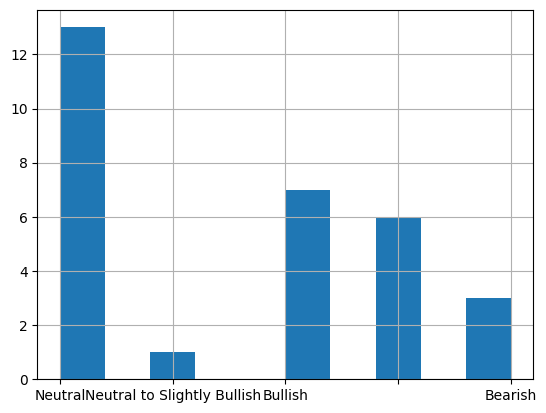

In [19]:
df["sentiment"].hist()

In [44]:
import feedparser

# res = feedparser.parse('https://decrypt.co/feed')
# res = feedparser.parse('https://www.theblock.co/rss.xml')
res = feedparser.parse("https://cryptonews.com/news/feed/")

In [45]:
res["entries"][0]["link"]

'https://cryptonews.com/news/bitcoin-cash-price-prediction-as-uptrend-continues-1000-bch/'

In [46]:
import requests

headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36"
}
response = requests.get(res["entries"][0]["link"], headers=headers, timeout=10)

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.content, "html.parser")

# Remove script and style elements
for script in soup(["script", "style", "nav", "footer", "header"]):
    script.decompose()

# Try to find main content
content = ""
for selector in [
    ".post-content",
    ".articleContent",
    ".article-single__content",
    "main",
    ".content",
    "article",
    ".article-content",
]:
    element = soup.select_one(selector)
    if element:
        content = element.get_text(strip=True)
        print(selector)
        break

if not content:
    content = soup.get_text(strip=True)
    print("text")

.article-single__content


In [50]:
content

'Bitcoin Cash Price Prediction as Uptrend Continues – How Quickly Can BCH Hit $1,000?Bitcoin CashPrice PredictionTechnical AnalysisAd DisclosureAd DisclosureWe believe in full transparency with our readers. Some of our content includes affiliate links, and we may earn a commission through these partnerships. However, this potential compensation never influences our analysis, opinions, or reviews. Our editorial content is created independently of our marketing partnerships, and our ratings are based solely on our established evaluation criteria.Read MoreAltcoin season sentiment is fueling a deeper capital rotation into risk assets, positioning Bitcoin Cash (BCH) for a potential move toward higher price targets.Ad DisclosureAd DisclosureWe believe in full transparency with our readers. Some of our content includes affiliate links, and we may earn a commission through these partnerships. However, this potential compensation never influences our analysis, opinions, or reviews. Our editoria